In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'data/processed/preprocessed_data.csv')
df.head()

,Maker,Gearbox,Fuel_type,Price,Engine_size,Prod_year,Model,Body_type,Runned_km
0,bentley,automatic,petrol,104060.0,6.8,2000.0,arnage,saloon,96560.0
1,bentley,automatic,petrol,139150.0,6.8,2002.0,arnage,saloon,70811.0
2,bentley,automatic,petrol,145195.0,6.8,2002.0,arnage,saloon,88514.0
3,bentley,automatic,petrol,169148.0,6.8,2003.0,arnage,saloon,22531.0
4,bentley,automatic,petrol,128526.0,6.8,2003.0,arnage,saloon,99219.0


## Correlation matrix for numeric columns

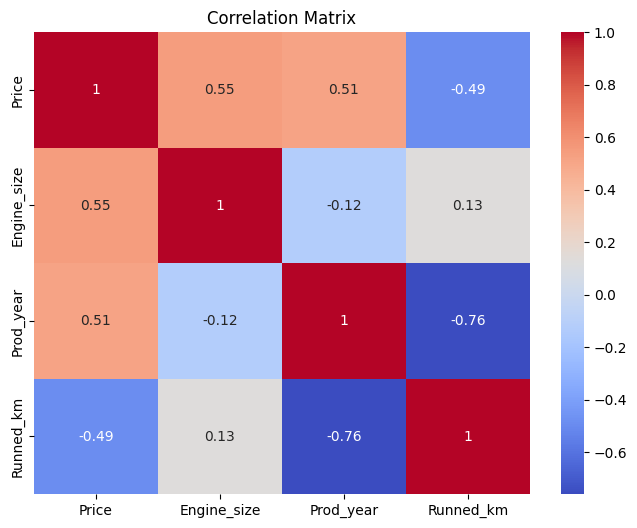

In [3]:
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Box plots for categorical columns

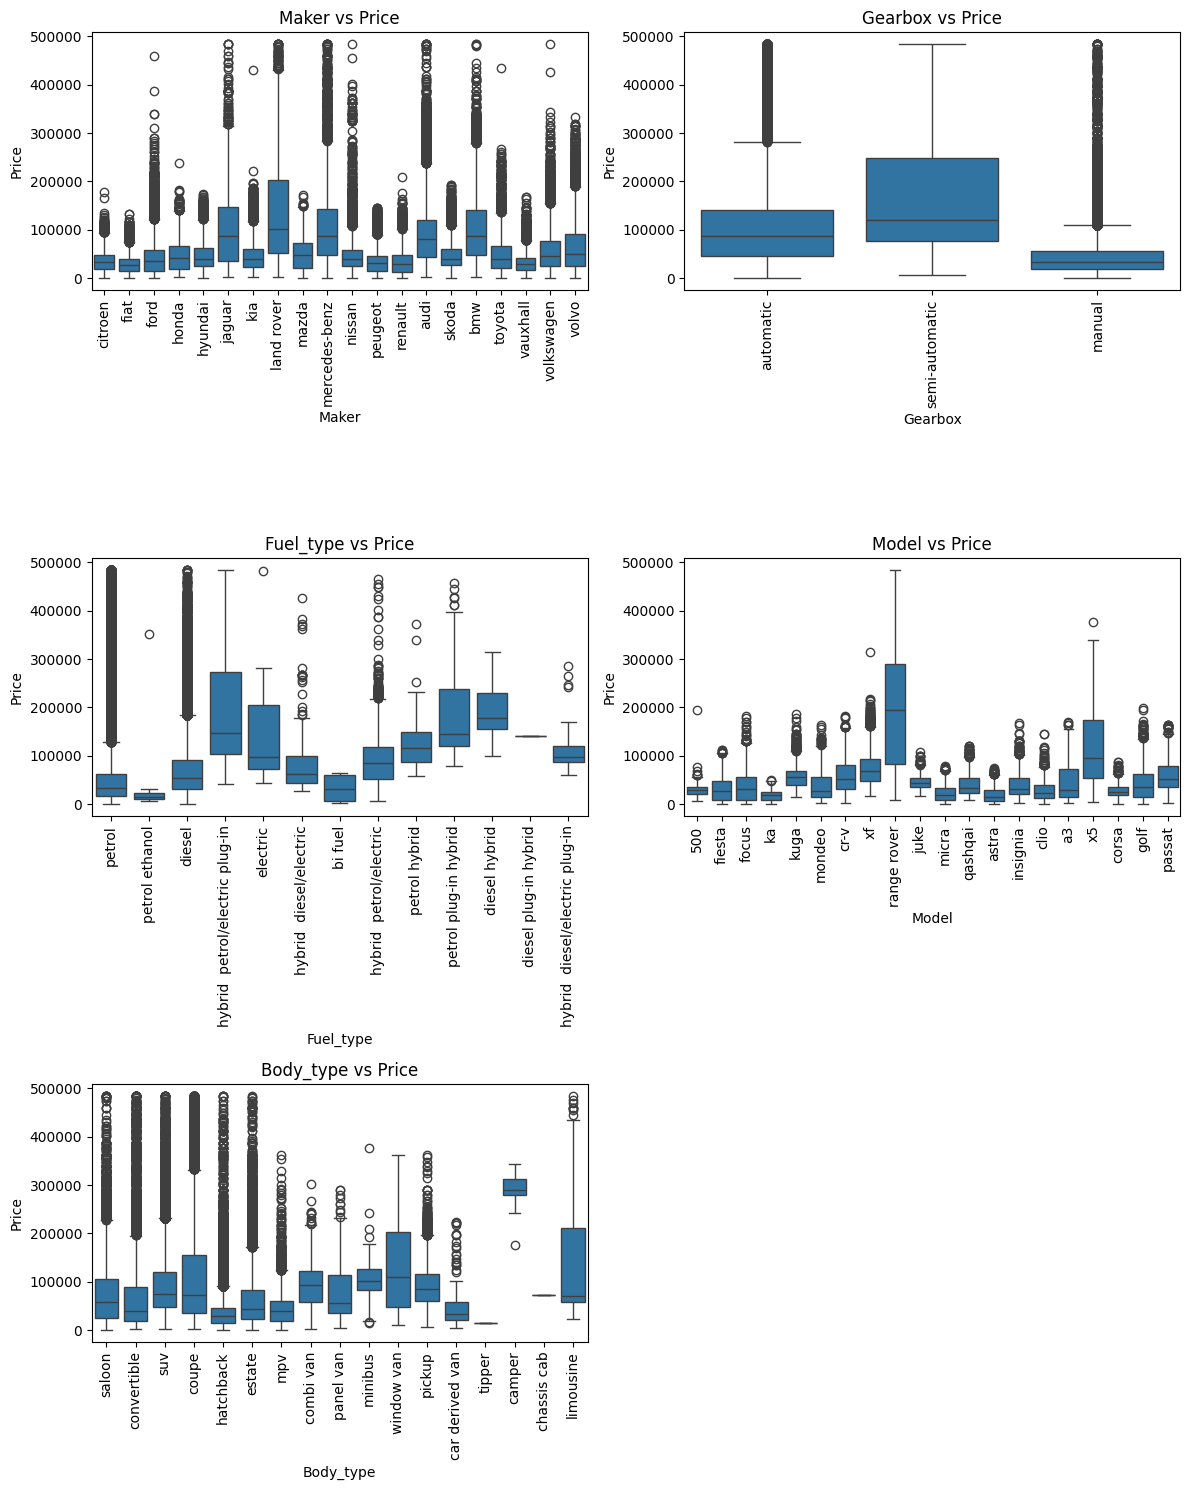

In [12]:
cat_cols = df.select_dtypes(include=["object"]).columns

n = len(cat_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    
    ax = axes[i]
    if df[col].nunique() > 20:
        top_vals = df[col].value_counts().index[:20]
        subset = df[df[col].isin(top_vals)]
    else:
        subset = df

    sns.boxplot(x=subset[col], y=subset["Price"], ax=ax)
    ax.set_title(f"{col} vs Price")
    ax.set_xlabel(col)
    ax.set_ylabel("Price")
    ax.tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()